In [4]:
!rm -rf ./images
!mkdir images

ғуыт


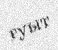

шығыстану


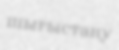

фотокамера


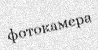

күдіктілік


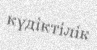

нәм


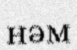

тірілткіз


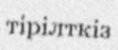

жәмпейле


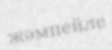

тыру


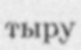

руынан


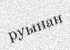

ызғындай


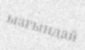

In [11]:

from trdg.generators import GeneratorFromDict

output = "./images"
generator = GeneratorFromDict(
    blur=2,
    length=1,
    random_blur=True,
    random_skew = True,
    size=50,
    skewing_angle=20,
    count=10,
    distorsion_type=3,
    # text_color="#000000",
    # fit=True,
    path="./kk_dict.txt",
    text_colors=["#282828", "#000000", "#333333", "#666666", "#999999"],
    fonts=["./Alice-Regular.ttf"],
    stroke_widths=[0],
    space_widths=[1.0],
    character_spacings=[0],
    stroke_fills=["#282828", "#000000", "#333333", "#666666", "#999999"],
)

offset = 100
for img, lbl in generator:
    print(lbl)
    img.show()
    offset = offset - 1
    if offset < 0:
        break